<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#导入工具包" data-toc-modified-id="导入工具包-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>导入工具包</a></span></li><li><span><a href="#导入数据" data-toc-modified-id="导入数据-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>导入数据</a></span></li><li><span><a href="#数据探索" data-toc-modified-id="数据探索-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>数据探索</a></span><ul class="toc-item"><li><span><a href="#基本信息" data-toc-modified-id="基本信息-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>基本信息</a></span></li><li><span><a href="#单变量分布" data-toc-modified-id="单变量分布-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>单变量分布</a></span></li><li><span><a href="#target与X" data-toc-modified-id="target与X-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>target与X</a></span></li><li><span><a href="#相关性" data-toc-modified-id="相关性-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>相关性</a></span></li><li><span><a href="#新特征" data-toc-modified-id="新特征-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>新特征</a></span></li><li><span><a href="#离群点" data-toc-modified-id="离群点-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>离群点</a></span></li><li><span><a href="#onehot" data-toc-modified-id="onehot-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>onehot</a></span></li></ul></li><li><span><a href="#数据预处理" data-toc-modified-id="数据预处理-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>数据预处理</a></span><ul class="toc-item"><li><span><a href="#工具包及数据" data-toc-modified-id="工具包及数据-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>工具包及数据</a></span></li><li><span><a href="#分离数据" data-toc-modified-id="分离数据-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>分离数据</a></span></li><li><span><a href="#标准化数据" data-toc-modified-id="标准化数据-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>标准化数据</a></span></li></ul></li><li><span><a href="#模型选择" data-toc-modified-id="模型选择-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>模型选择</a></span><ul class="toc-item"><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>LinearRegression</a></span></li><li><span><a href="#SGDRegressor" data-toc-modified-id="SGDRegressor-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>SGDRegressor</a></span></li><li><span><a href="#RidgeCV" data-toc-modified-id="RidgeCV-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>RidgeCV</a></span></li><li><span><a href="#Lasso" data-toc-modified-id="Lasso-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Lasso</a></span></li></ul></li><li><span><a href="#结论" data-toc-modified-id="结论-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>结论</a></span></li></ul></div>

# 导入工具包

In [67]:
# 数据读取及基本处理
import pandas as pd
import numpy as np

#查看数据分布是否对称/计算斜度/是否需要log或
from scipy.stats import skew

#可视化
import matplotlib.pyplot as plt
import seaborn as sns
# 显示文件图片
from IPython.display import display
# float显示三位小数 
pd.set_option('display.float_format', lambda x: '%.3f' % x) 
%matplotlib inline

In [68]:
# 设置一些全局的资源参数，可以进行个性化修改
import matplotlib

matplotlib.rc('figure', figsize = (12, 7))
matplotlib.rc('font', size = 14)
matplotlib.rc('axes', grid = False)
matplotlib.rc('axes', facecolor = 'white')

# 导入数据

In [69]:
data = pd.read_csv("../data/Bike-Sharing-Dataset/day.csv")
data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344,0.364,0.806,0.160,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363,0.354,0.696,0.249,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196,0.189,0.437,0.248,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200,0.212,0.590,0.160,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.227,0.229,0.437,0.187,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204,0.233,0.518,0.090,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.197,0.209,0.499,0.169,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165,0.162,0.536,0.267,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138,0.116,0.434,0.362,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.151,0.151,0.483,0.223,41,1280,1321


# 数据探索

## 基本信息

In [70]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000,731.000,731.000,731.000,731.000,731.000,731.000,731.000,731.000,731.000,731.000,731.000,731.000,731.000,731.000
mean,366.000,2.497,0.501,6.520,0.029,2.997,0.684,1.395,0.495,0.474,0.628,0.190,848.176,3656.172,4504.349
std,211.166,1.111,0.500,3.452,0.167,2.005,0.465,0.545,0.183,0.163,0.142,0.077,686.622,1560.256,1937.211
min,1.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.059,0.079,0.000,0.022,2.000,20.000,22.000
25%,183.500,2.000,0.000,4.000,0.000,1.000,0.000,1.000,0.337,0.338,0.520,0.135,315.500,2497.000,3152.000
50%,366.000,3.000,1.000,7.000,0.000,3.000,1.000,1.000,0.498,0.487,0.627,0.181,713.000,3662.000,4548.000
75%,548.500,3.000,1.000,10.000,0.000,5.000,1.000,2.000,0.655,0.609,0.730,0.233,1096.000,4776.500,5956.000
max,731.000,4.000,1.000,12.000,1.000,6.000,1.000,3.000,0.862,0.841,0.973,0.507,3410.000,6946.000,8714.000


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


共16列特征, 目标为casual, registered, cnt 

无object型数据: "dteday"(dteday看做连续型)

continuous型数据:  "cnt", "registered", "casual", "windspeed", "hum", "atemp", "temp", "instant"

discrete型数据: "season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"
 
 target = "cnt"

In [72]:
#是否有空缺值
data.isnull().sum() 

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

 无nan

## 单变量分布

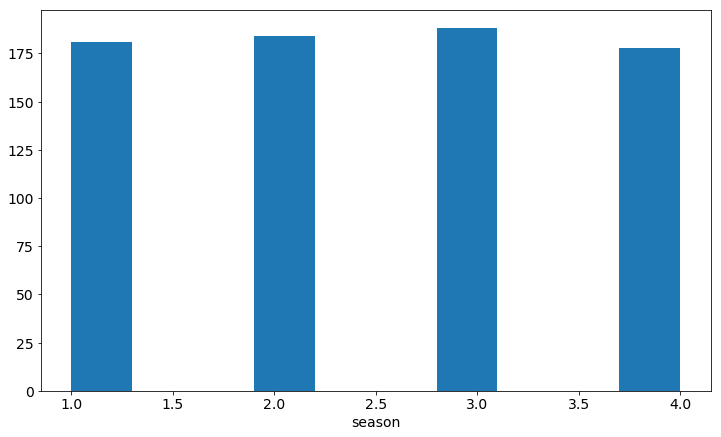

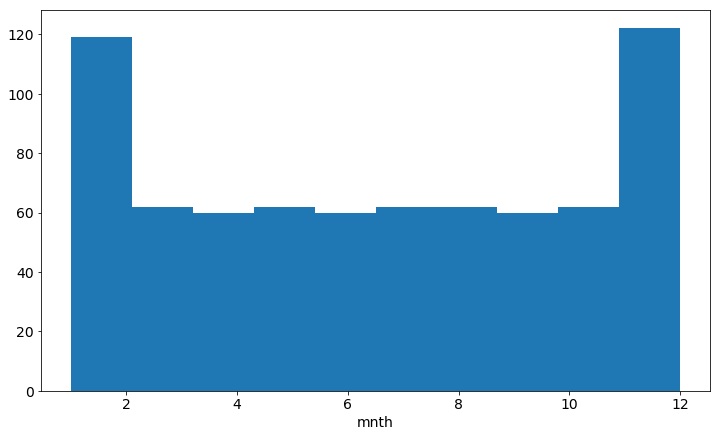

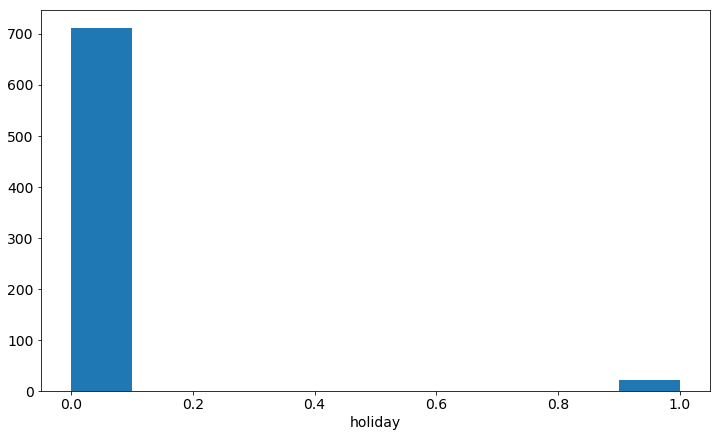

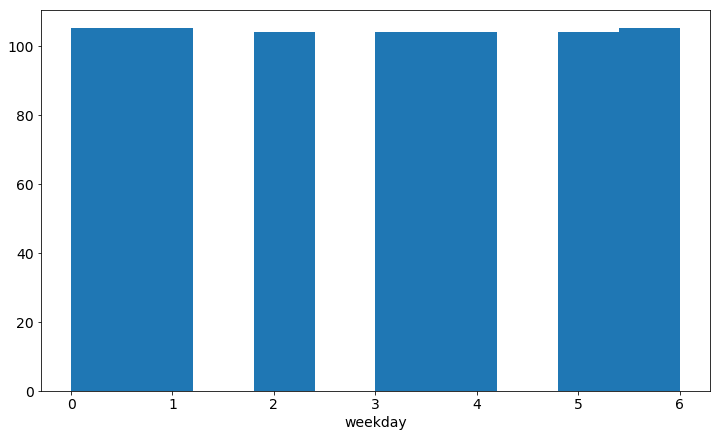

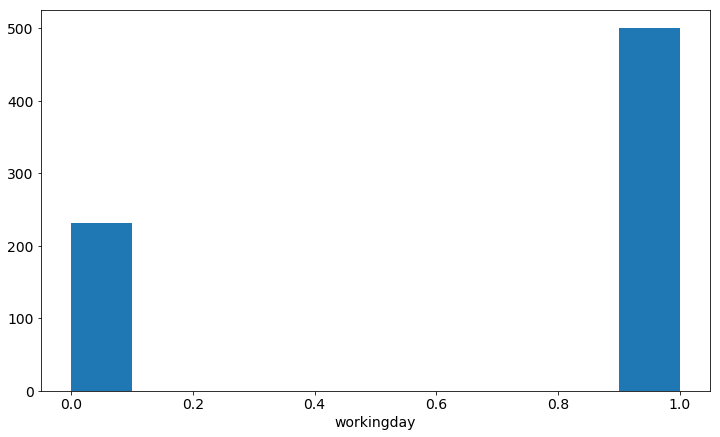

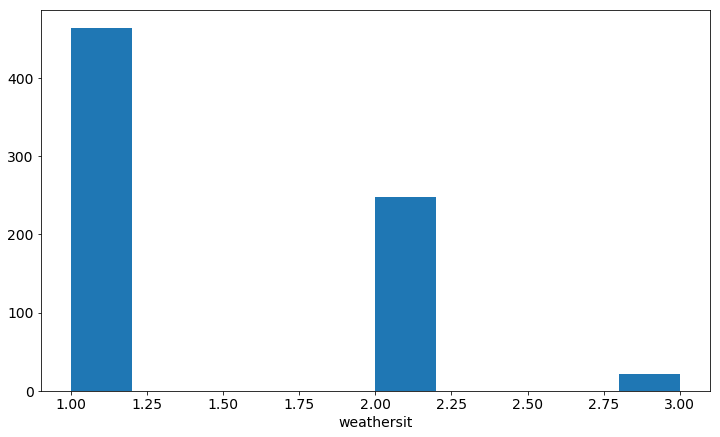

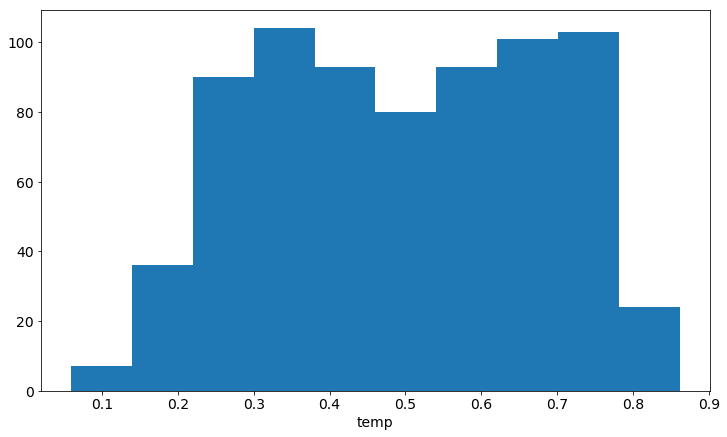

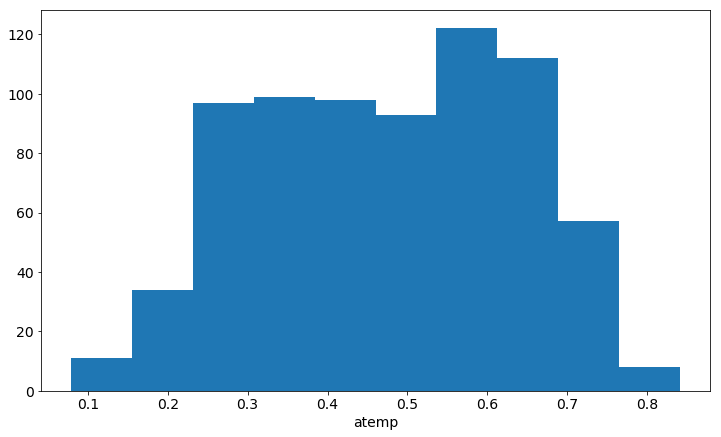

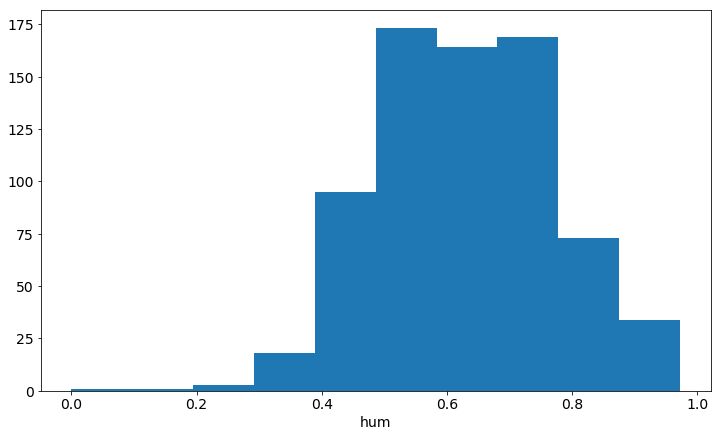

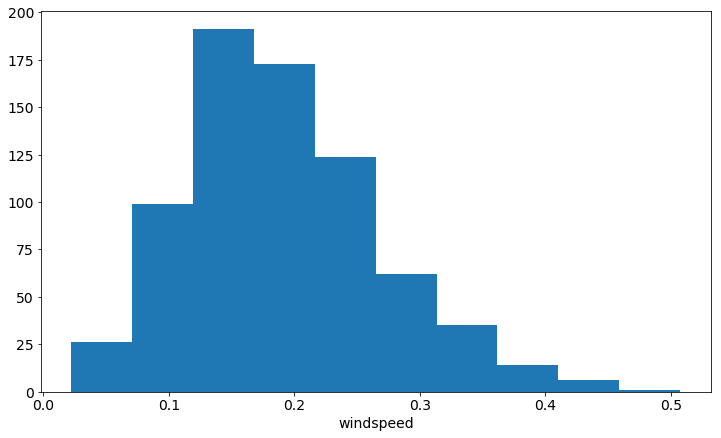

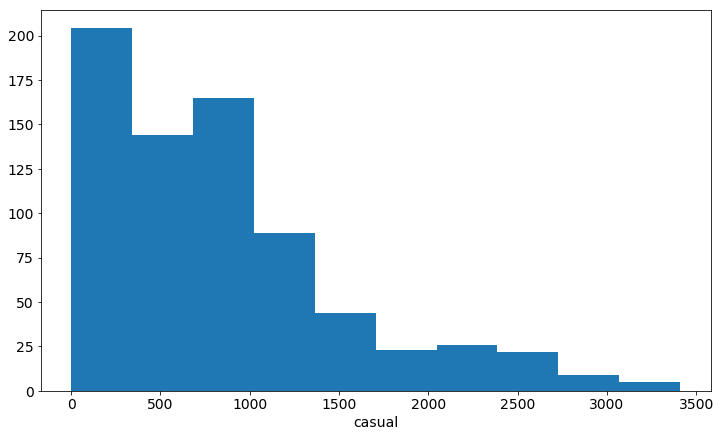

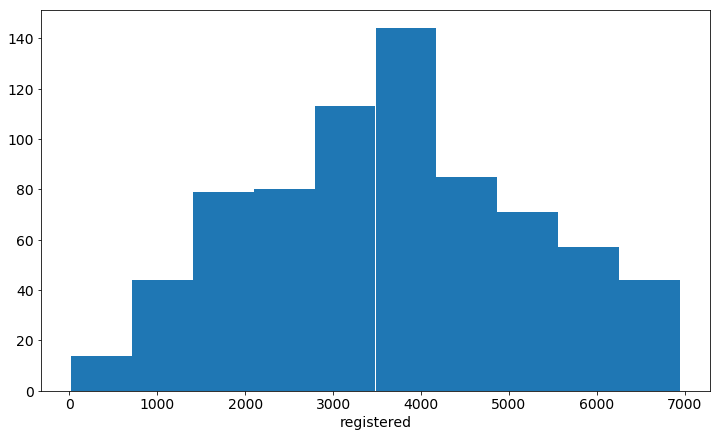

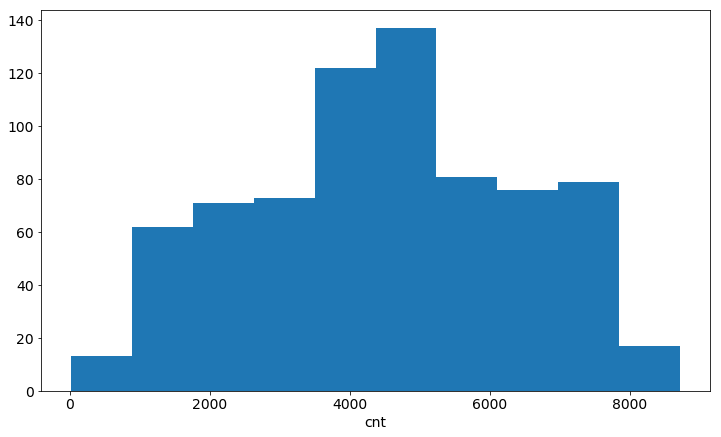

In [73]:
# 特征名
data_cols = data.columns

for col in data_cols.drop(["dteday", "instant", "yr"]):
    plt.hist(data[col])   #这三个的直方图无意义
    plt.xlabel(col)
    plt.show()

## target与X

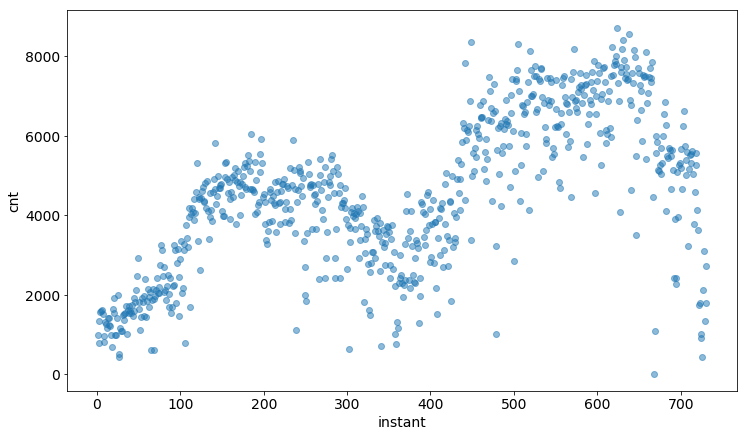

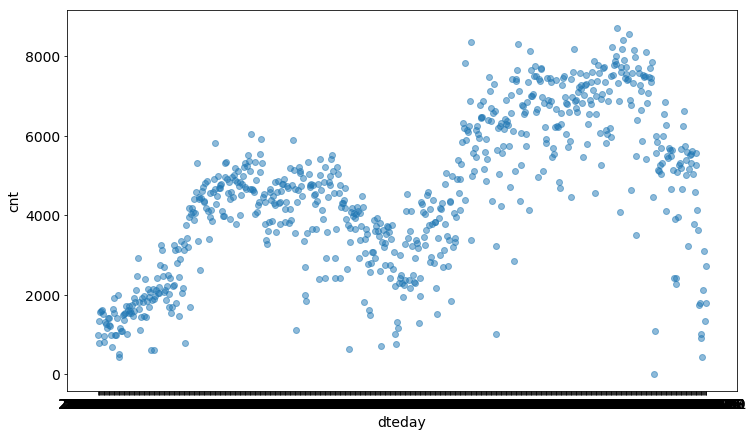

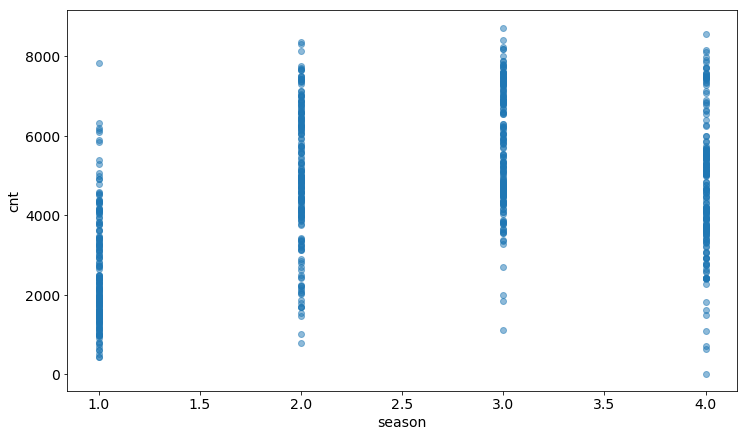

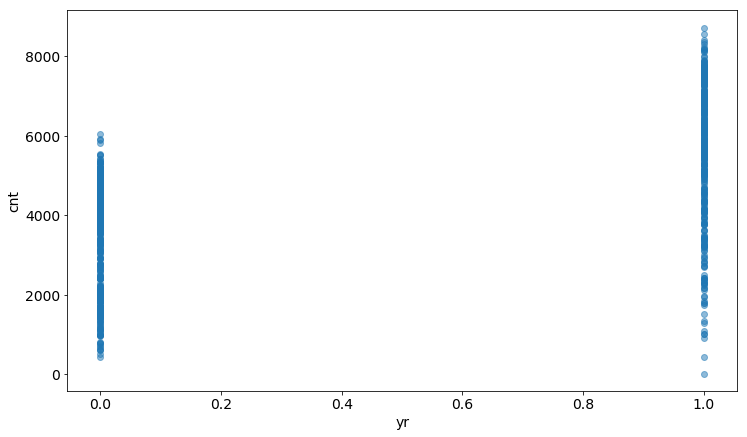

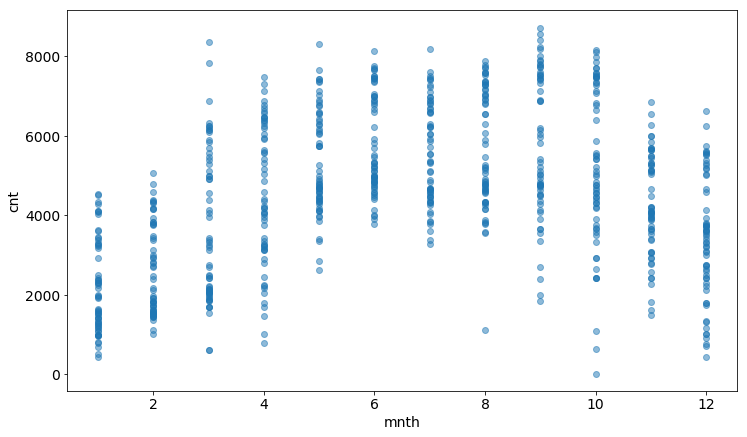

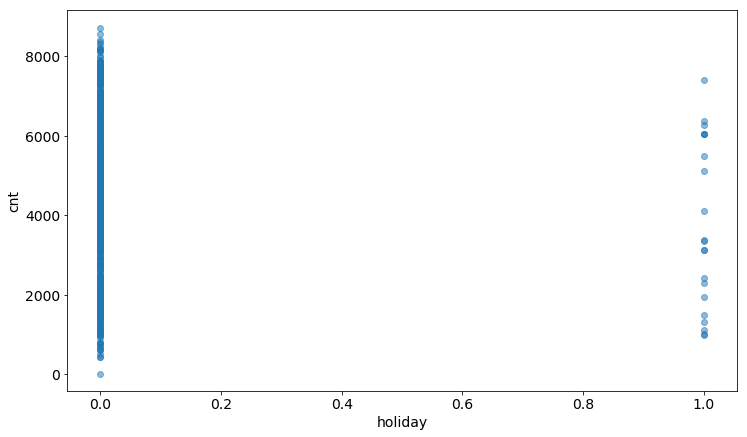

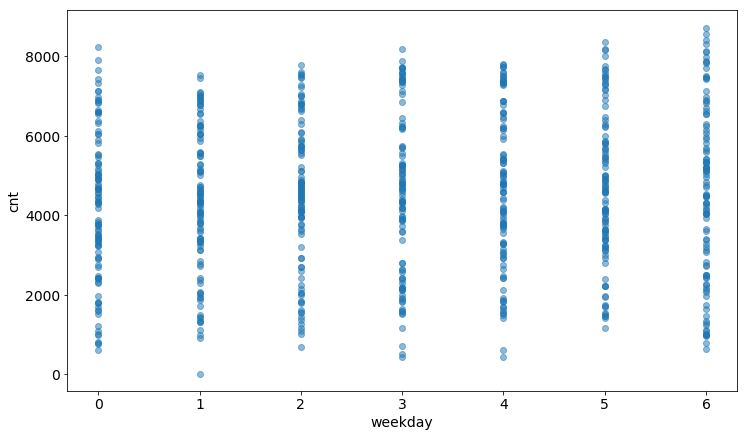

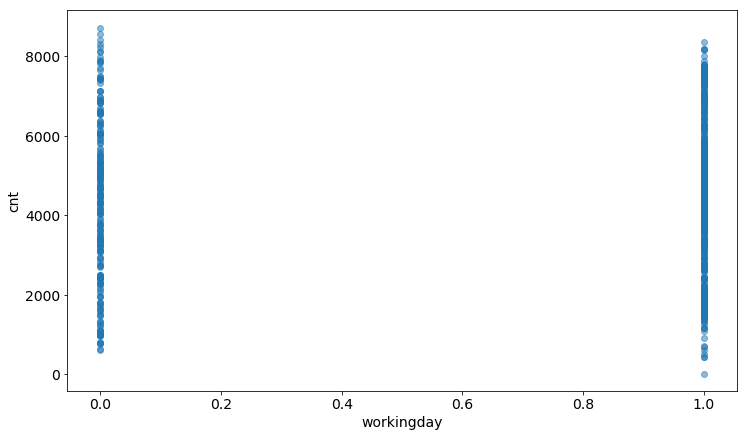

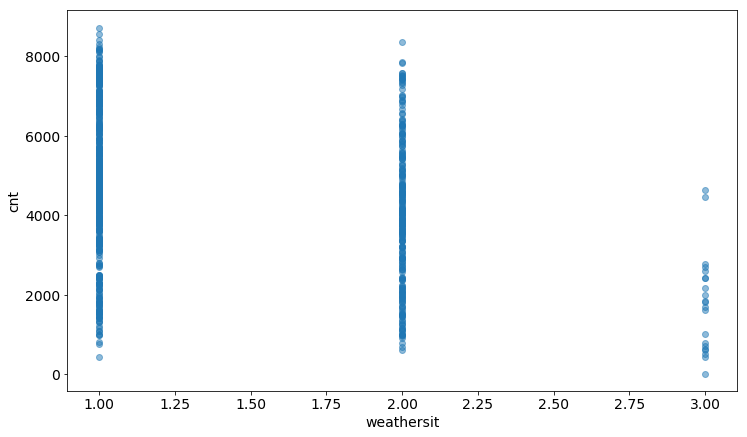

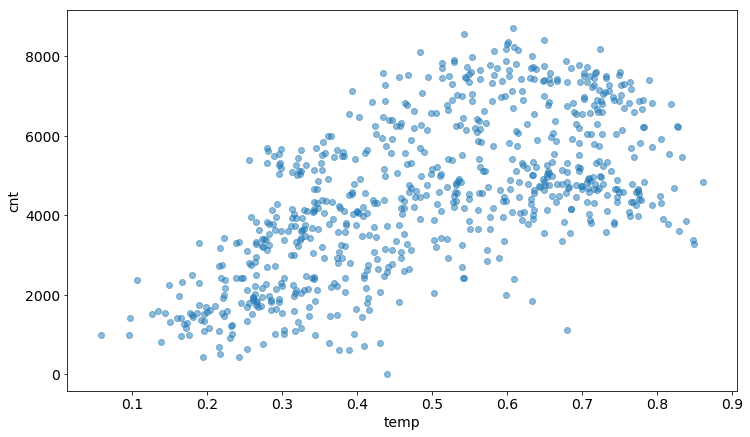

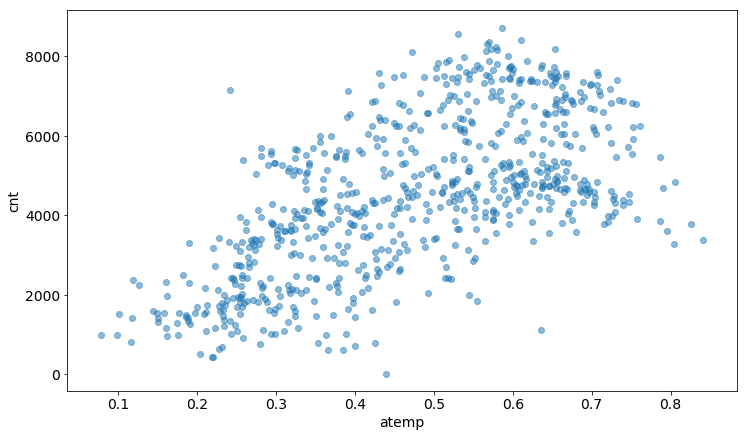

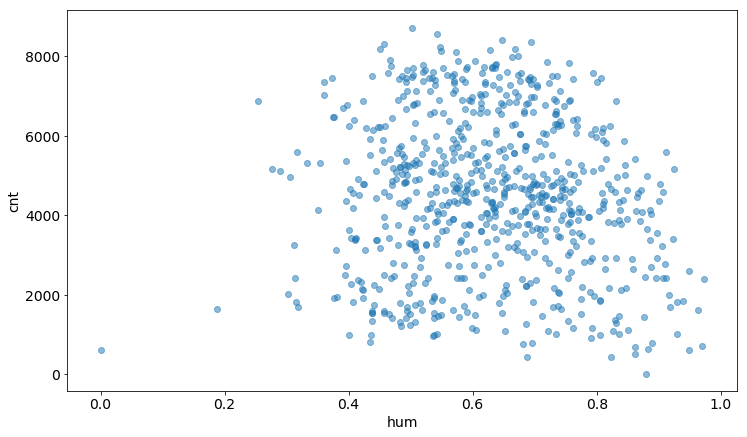

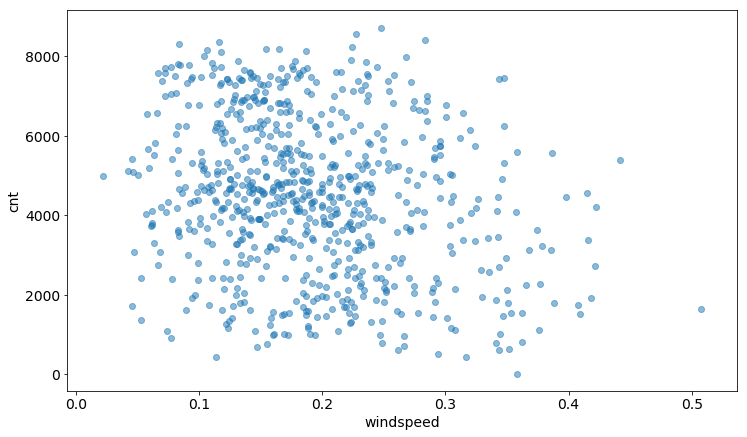

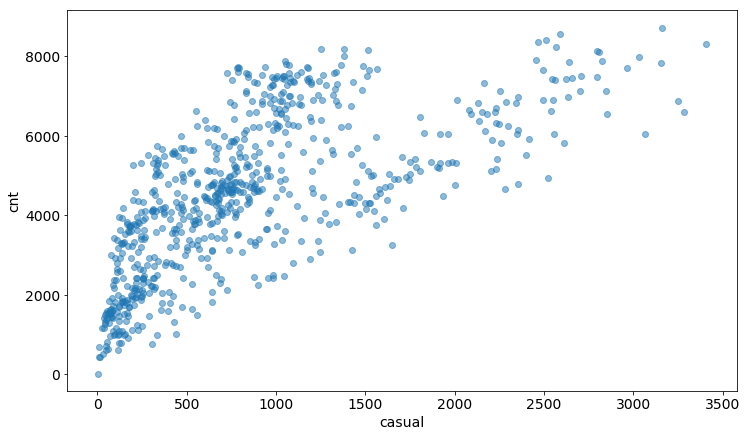

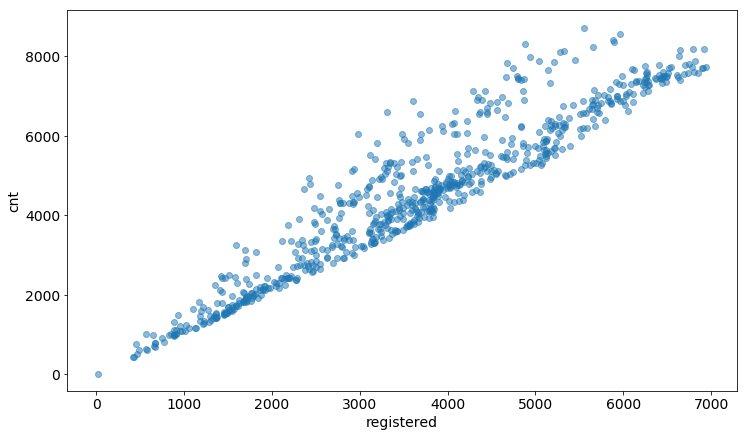

In [74]:
# 查看其它变量与target之间的关系
target = data["cnt"]
for col in data_cols.drop("cnt"):
    X = data[col]
    plt.scatter(X, target, alpha=0.5)
    plt.xlabel(col)
    plt.ylabel("cnt")
    plt.show()

## 相关性

In [75]:
data_corr = data.corr().abs() #相关性矩阵
size = data_corr.shape[1] # for上界
cols = list(data.columns) # 相关性矩阵特征名
threshold = 0.5 # 相关性分界线
data_corr_list = [] # 相关性大小排序list
# 格式为: [相关性大小, 特征名[i],特征名[j]]

for i in range(0, size):
    for j in range(i+1, size): # 对称矩阵,取一半
        data_corr_list.append([data_corr.iloc[i,j], i, j])
# 按相关性大小进行排序
data_corr_list = sorted(data_corr_list,key=lambda x:-x[0])
# 输出相关性大于threshold的特征
for v,i,j in data_corr_list:
    if v > threshold:
        print("%3.3f is %s and %s" % (v,cols[i],cols[j])) 
#       记得加括号(cols[i],cols[j],v)


0.992 is weathersit and temp
0.946 is casual and registered
0.866 is instant and season
0.831 is dteday and yr
0.673 is windspeed and registered
0.660 is instant and casual
0.631 is temp and registered
0.629 is instant and registered
0.627 is weathersit and registered
0.594 is season and casual
0.591 is workingday and atemp
0.567 is season and registered
0.544 is temp and casual
0.544 is temp and windspeed
0.543 is weathersit and windspeed
0.540 is weathersit and casual
0.518 is weekday and windspeed


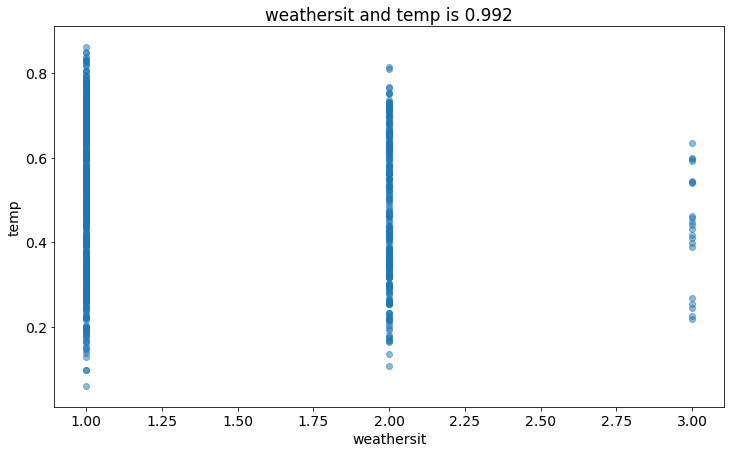

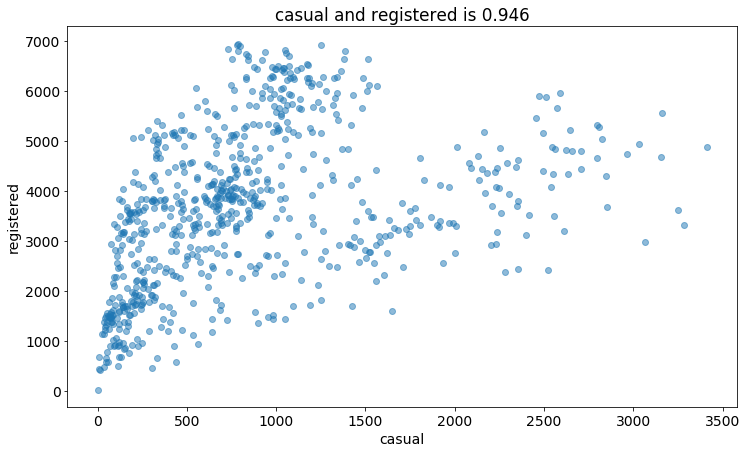

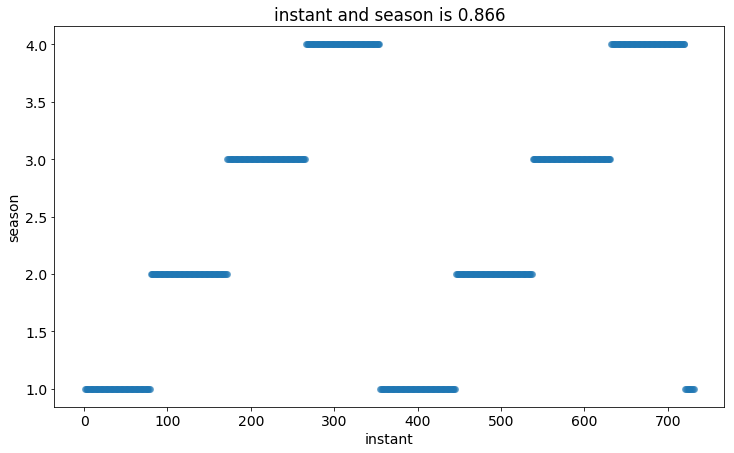

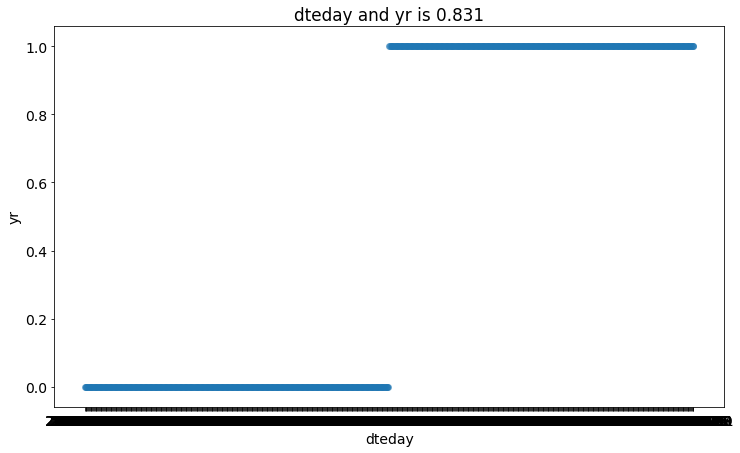

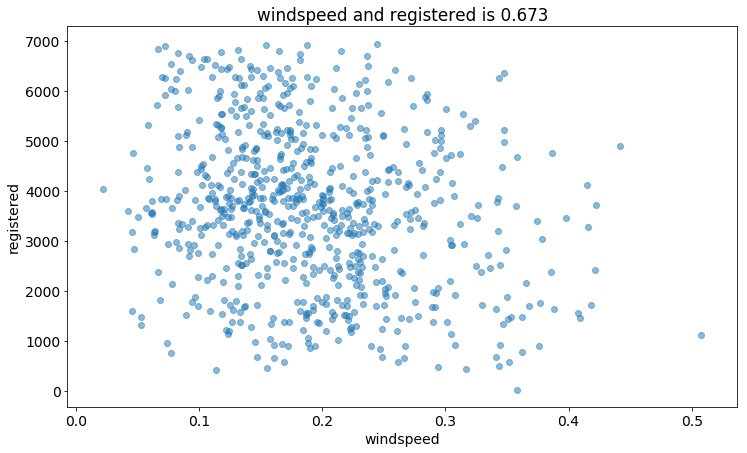

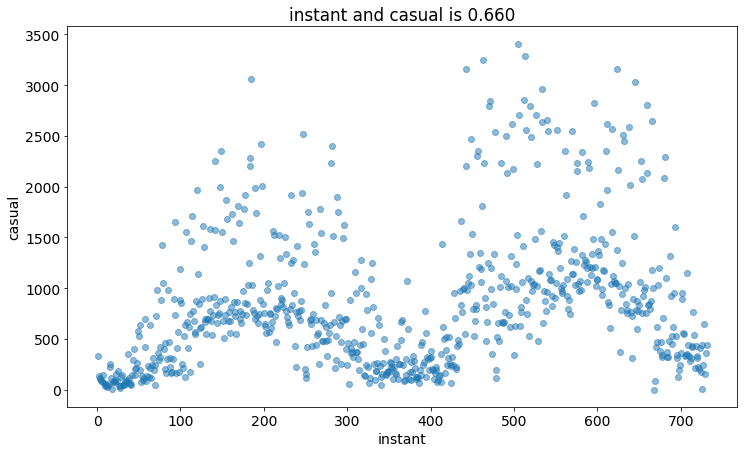

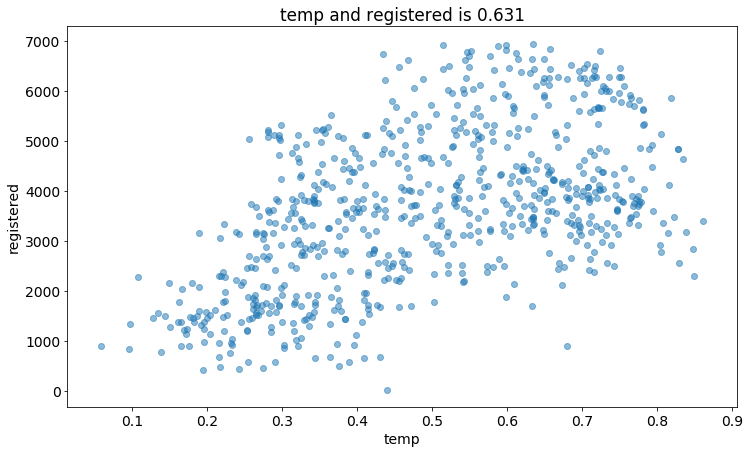

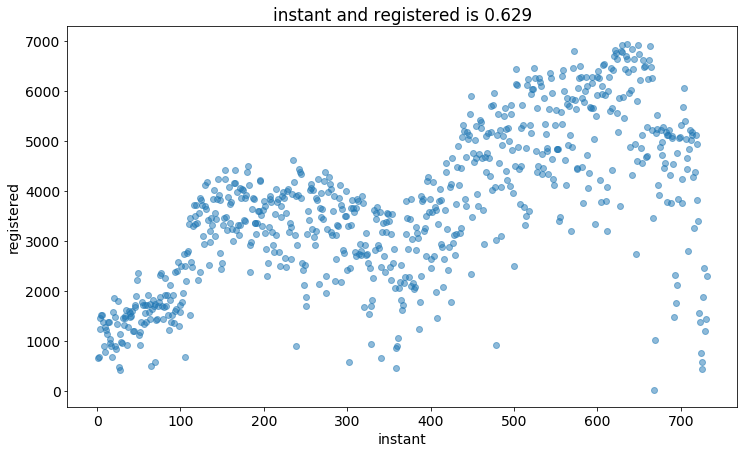

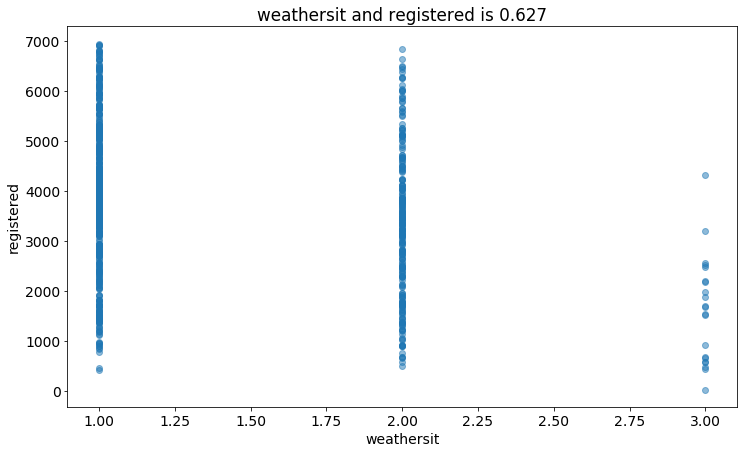

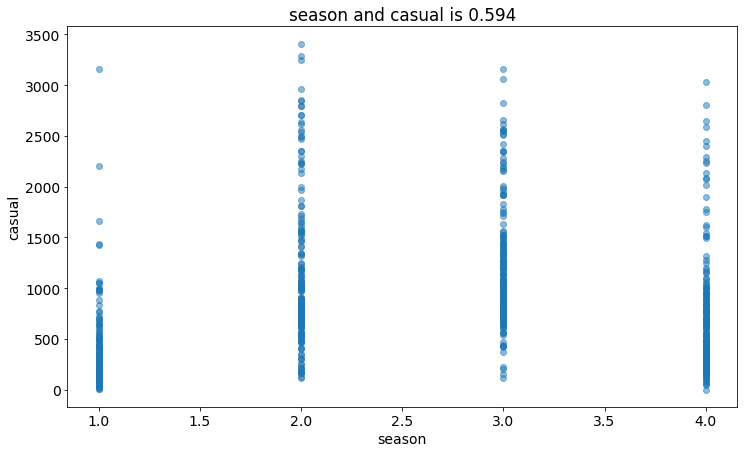

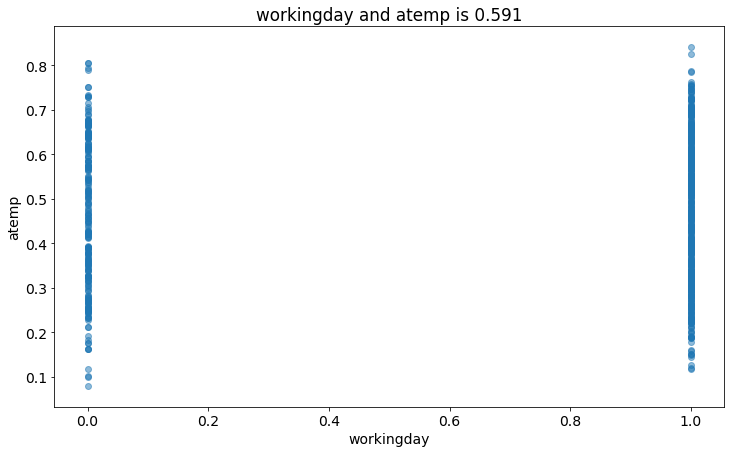

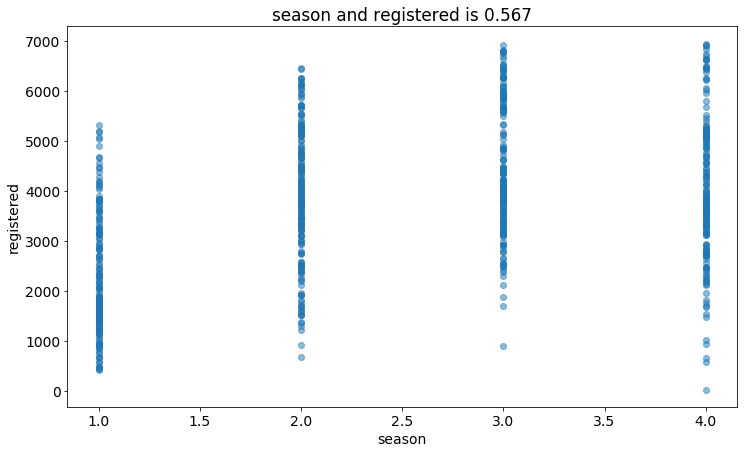

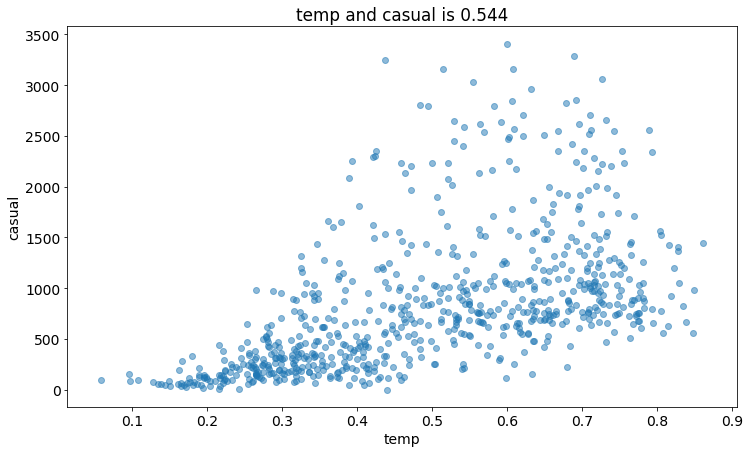

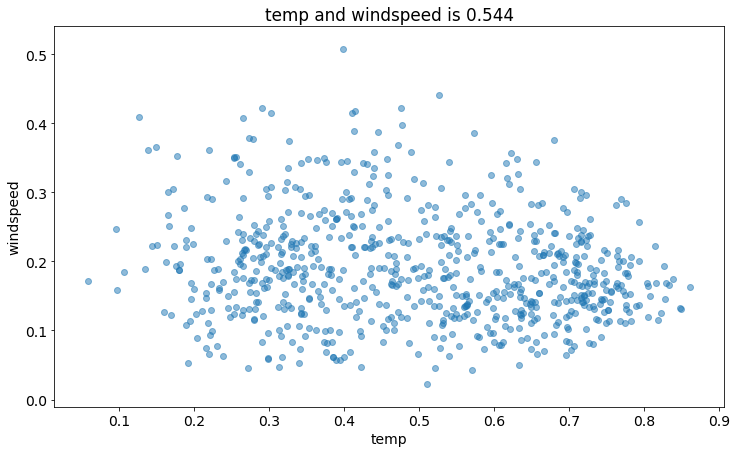

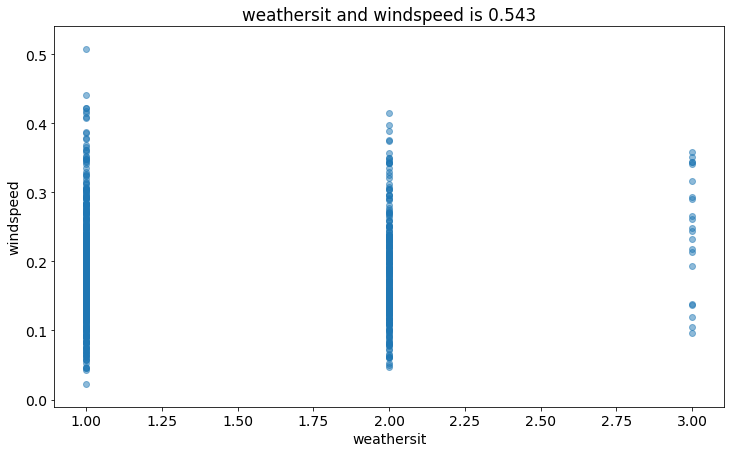

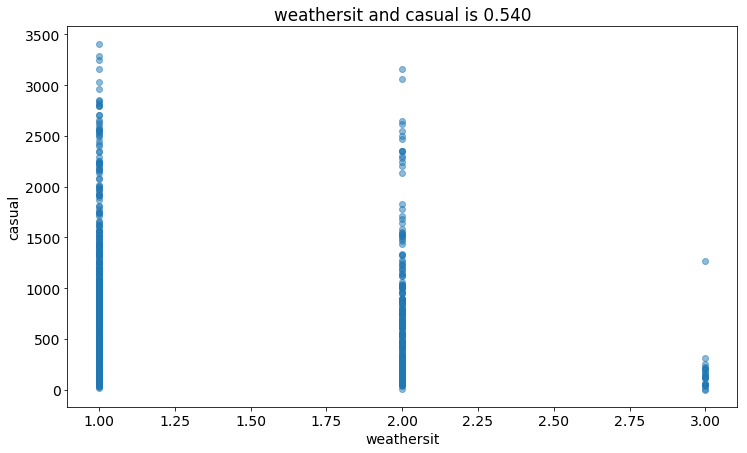

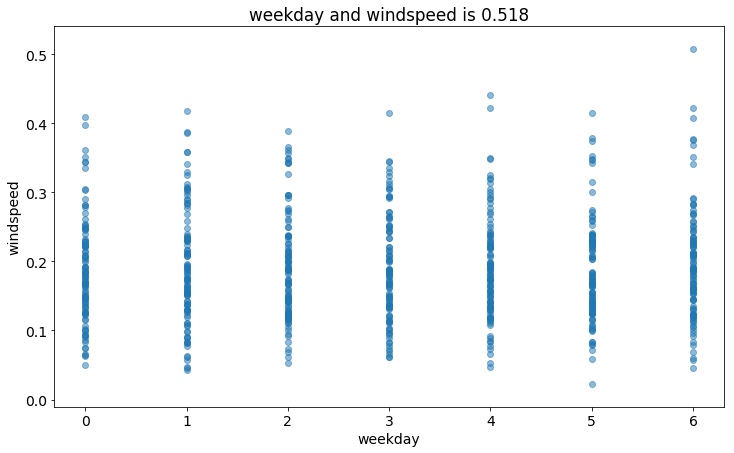

In [76]:
# 相关性大于threshold 特征之间的散点图
for v,i,j in data_corr_list:
    if v > threshold:
        plt.scatter(data[cols[i]], data[cols[j]], alpha=0.5)
        plt.xlabel(cols[i])
        plt.ylabel(cols[j])
        plt.title("%s and %s is %3.3f" % (cols[i],cols[j],v)) 
        plt.show()  

## 新特征
weathersit_div_temp, temp_div_atemp, hum_mul_wind, temp_mul_temp, atemp_mul_atemp

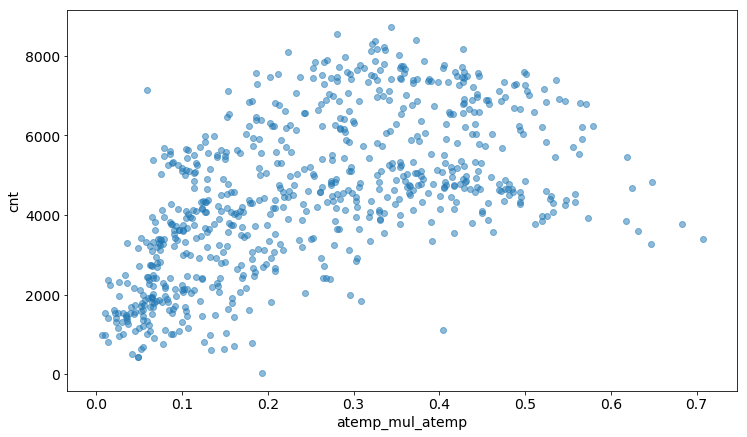

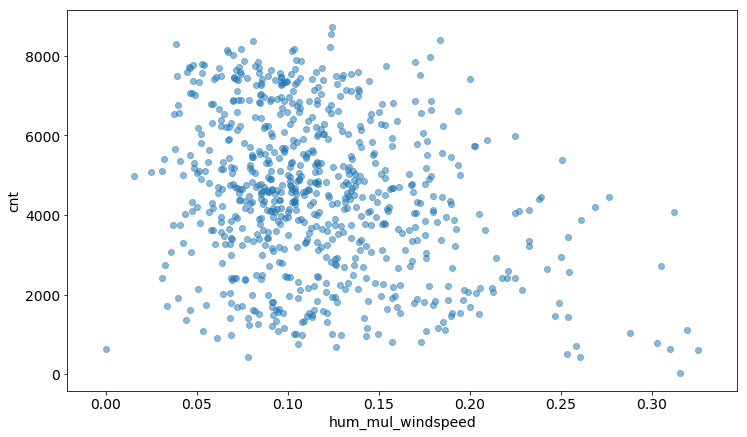

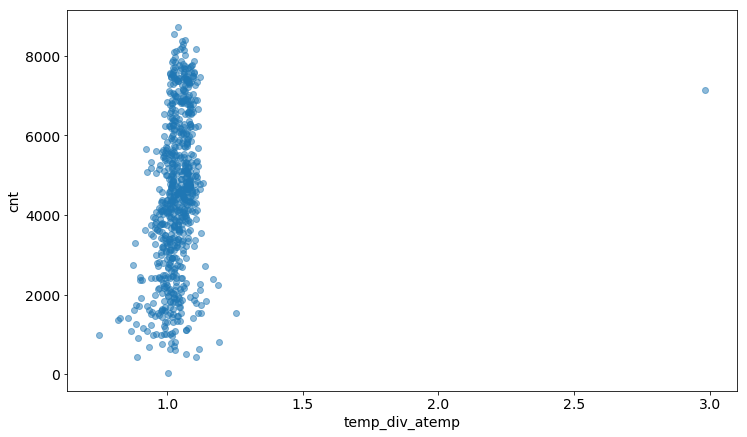

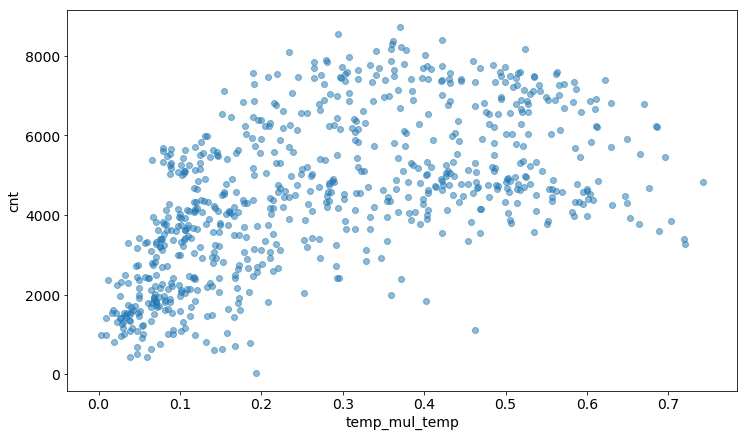

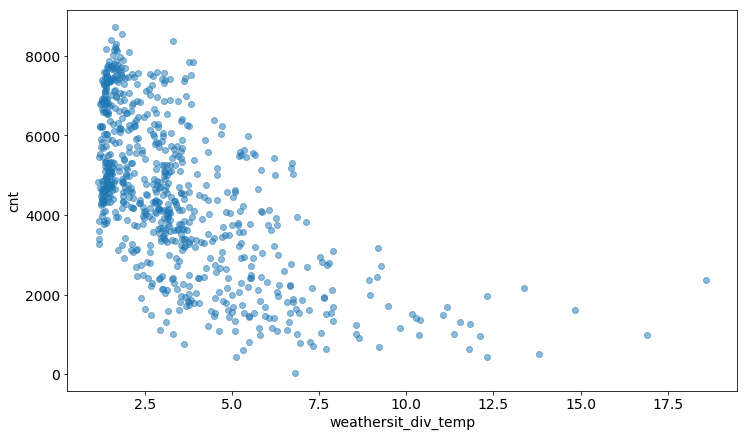

In [77]:
# 新特征组成的dict
new_features = {"temp_div_atemp": data.temp.values/data.atemp.values,
               "hum_mul_windspeed":data.hum.values*data.windspeed.values,
               "temp_mul_temp":data.temp.values**2,
               "atemp_mul_atemp":data.atemp.values**2,
               "weathersit_div_temp":data.weathersit.values/data.temp.values}
#new_features.join(data.temp.values/data.atemp.values)
new_features = pd.DataFrame(new_features)
# 添加新特征到data
data = data.join(new_features)
# 查看new_features与target的相关性
for col in new_features:
    x = data[col]
    plt.scatter(x, target, alpha=0.5)
    plt.xlabel(col)
    plt.ylabel("cnt")
    plt.show()

删除outliner
temp_div_atemp<1.5

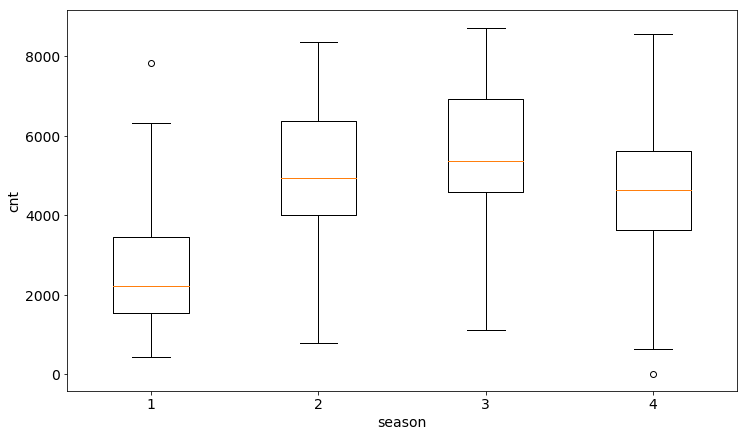

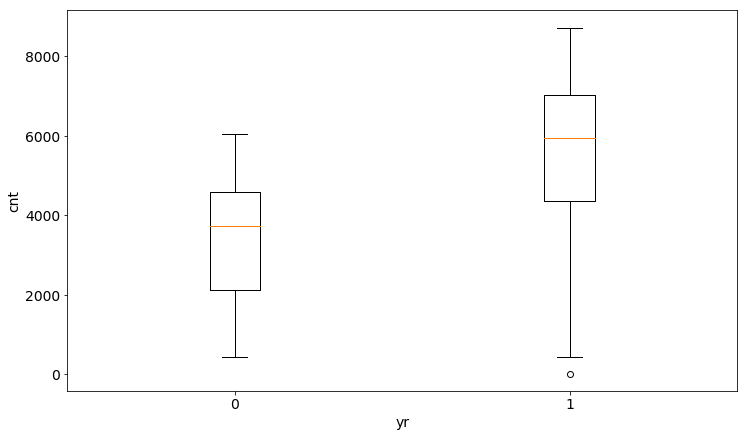

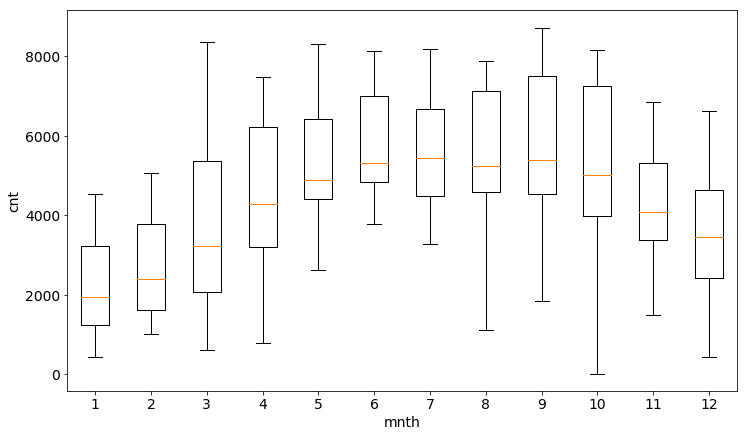

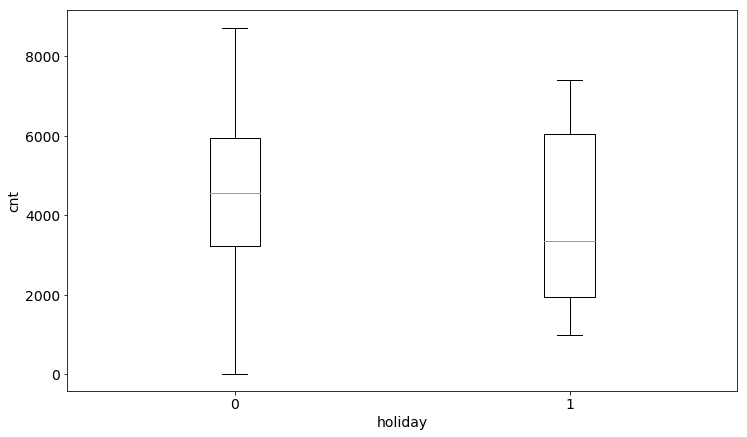

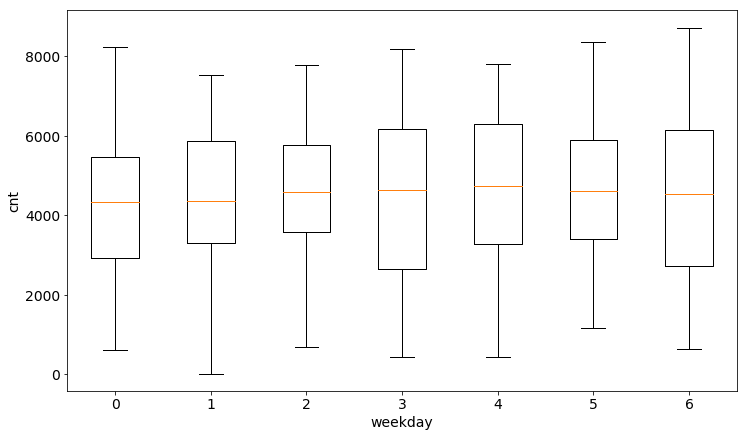

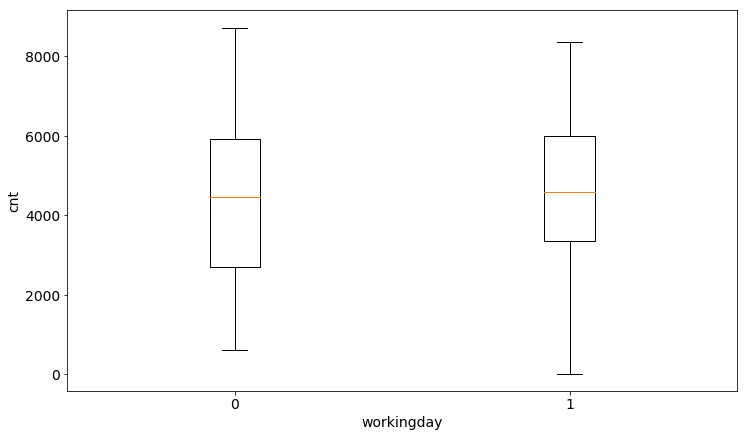

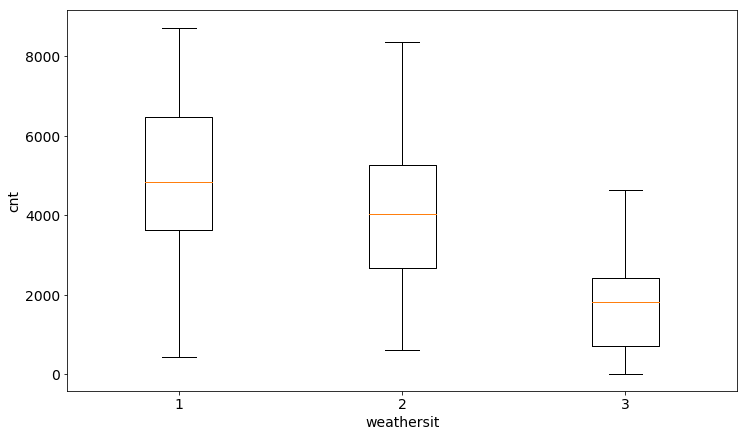

In [78]:
# 查看离散型数据与target的箱型图
descrete = ["season", "yr", "mnth", "holiday", "weekday", 
            "workingday", "weathersit"]
for col in descrete:
    x = set(data[col]) # labels, 用set()去重
    y = [] #labeks对应数据集
    for v in x:
        y.append(list(target[data[col]==v]))
    plt.boxplot(y, labels=x)
    plt.xlabel(col)
    plt.ylabel("cnt")
    plt.show()


离群点
(data.season==1) & (data.cnt>7000)
(data.season==4) & (data.cnt<100)
(data.yr==1) & (data.cnt<100)
data[(data.yr==1)].cnt.sort_values() 
具体查看cnt的值,图上看不清楚

## 离群点

In [79]:
# 离群点对应的instant
outliner =      list(data[(data.season==1) & (data.cnt>7000)].instant)
outliner.extend(list(data[(data.season==4) & (data.cnt<100)].instant))
outliner.extend(list(data[(data.yr==1) & (data.cnt<100)].instant))
outliner.extend(list(data[data.temp_div_atemp>1.5].instant))

outliner = set(outliner) #去除重复
print("原始数据",data.shape)
for v in outliner:
    data = data[data.instant!=v]
print("删除之后",data.shape)

原始数据 (731, 21)
删除之后 (728, 21)


## onehot

In [80]:
data = pd.get_dummies(data, columns=["season", "yr", "mnth", "holiday"
                              , "weekday", "workingday", "weathersit"])
data

,instant,dteday,temp,atemp,hum,windspeed,casual,registered,cnt,atemp_mul_atemp,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3
0,1,2011-01-01,0.344,0.364,0.806,0.160,331,654,985,0.132,...,0,0,0,0,1,1,0,0,1,0
1,2,2011-01-02,0.363,0.354,0.696,0.249,131,670,801,0.125,...,0,0,0,0,0,1,0,0,1,0
2,3,2011-01-03,0.196,0.189,0.437,0.248,120,1229,1349,0.036,...,0,0,0,0,0,0,1,1,0,0
3,4,2011-01-04,0.200,0.212,0.590,0.160,108,1454,1562,0.045,...,1,0,0,0,0,0,1,1,0,0
4,5,2011-01-05,0.227,0.229,0.437,0.187,82,1518,1600,0.053,...,0,1,0,0,0,0,1,1,0,0
5,6,2011-01-06,0.204,0.233,0.518,0.090,88,1518,1606,0.054,...,0,0,1,0,0,0,1,1,0,0
6,7,2011-01-07,0.197,0.209,0.499,0.169,148,1362,1510,0.044,...,0,0,0,1,0,0,1,0,1,0
7,8,2011-01-08,0.165,0.162,0.536,0.267,68,891,959,0.026,...,0,0,0,0,1,1,0,0,1,0
8,9,2011-01-09,0.138,0.116,0.434,0.362,54,768,822,0.013,...,0,0,0,0,0,1,0,1,0,0
9,10,2011-01-10,0.151,0.151,0.483,0.223,41,1280,1321,0.023,...,0,0,0,0,0,0,1,1,0,0


In [81]:
# 保存特征工程后的数据
data.to_csv("../data/Bike-Sharing-Dataset/data_FE.csv"
            , index=False)

# 数据预处理

## 工具包及数据

In [82]:
# 导入必要工具包
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
# 导入评分工具
from sklearn.metrics import mean_squared_error

In [83]:
# 导入特征工程后的数据
data_FE = pd.read_csv("../data/Bike-Sharing-Dataset/data_FE.csv")
data_FE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 46 columns):
instant                728 non-null int64
dteday                 728 non-null object
temp                   728 non-null float64
atemp                  728 non-null float64
hum                    728 non-null float64
windspeed              728 non-null float64
casual                 728 non-null int64
registered             728 non-null int64
cnt                    728 non-null int64
atemp_mul_atemp        728 non-null float64
hum_mul_windspeed      728 non-null float64
temp_div_atemp         728 non-null float64
temp_mul_temp          728 non-null float64
weathersit_div_temp    728 non-null float64
season_1               728 non-null int64
season_2               728 non-null int64
season_3               728 non-null int64
season_4               728 non-null int64
yr_0                   728 non-null int64
yr_1                   728 non-null int64
mnth_1                 728 non-null 

## 分离数据

In [132]:
# 分出 X, y
X_data = data_FE.drop(["dteday","cnt","casual","registered"], axis=1)
y_data = data_FE["cnt"]

In [133]:
#分割训练数据与测试数据
from sklearn.model_selection import train_test_split

# 随机采样25%的数据构建测试样本，其余作为训练样本
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data
                                                    , random_state=33
                                                    , test_size=0.2)

## 标准化数据

In [134]:
# 标准化X
from sklearn.preprocessing import StandardScaler

ss_X = StandardScaler()
ss_y = StandardScaler()

X_train = ss_X.fit_transform(X_train)
X_test = ss_X.fit_transform(X_test)

y_train = ss_y.fit_transform(y_train.reshape(-1, 1))
y_test  = ss_y.fit_transform(y_test.reshape(-1, 1))


I:\Anaconda2\envs\python3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # Remove the CWD from sys.path while we load stuff.
I:\Anaconda2\envs\python3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
I:\Anaconda2\envs\python3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # This is added back by InteractiveShellApp.init_path()


# 模型选择

## LinearRegression

In [135]:

# 使用默认配置初始化
lr = LinearRegression()

# 训练模型参数
lr.fit(X_train, y_train)

# 预测，下面计算score会自动调用predict
lr_y_predict = lr.predict(X_test)
lr_y_predict_train = lr.predict(X_train)

#显示特征的回归系数
lr.coef_

array([[ -7.28243294e-01,   7.10559832e+00,  -4.46354697e+00,
         -1.86227318e-01,  -2.17241977e-01,   2.45413049e+00,
          1.04037231e-01,  -1.91995906e-01,  -4.49754817e+00,
          2.48011805e-01,   2.05476532e+11,   2.08240221e+11,
          2.08686103e+11,   1.99999502e+11,  -1.15395613e+11,
         -1.15395613e+11,  -3.18904056e+11,  -3.10255109e+11,
         -3.13176625e+11,  -3.21712030e+11,  -3.18904056e+11,
         -3.07293600e+11,  -3.10255109e+11,  -3.21712030e+11,
         -3.04290928e+11,  -2.98157110e+11,  -3.07293600e+11,
         -3.07293600e+11,   2.69144099e+11,  -7.53658745e+11,
         -3.39992879e+12,  -1.33430223e+12,  -1.34777252e+12,
         -1.37393787e+12,  -1.35440934e+12,  -1.33430223e+12,
         -3.56348901e+12,   1.84251152e+12,  -1.03513778e+12,
         -3.82212905e+11,  -3.76381516e+11,  -1.21573956e+11]])

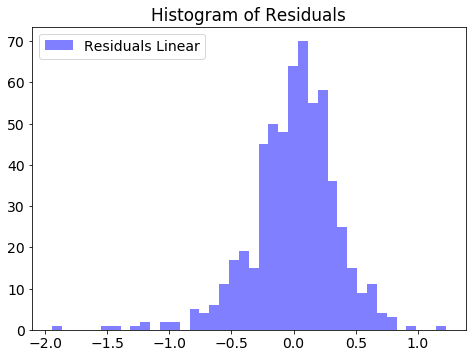

In [136]:
f, ax = plt.subplots(figsize=(7, 5)) 
f.tight_layout() 
ax.hist(y_train - lr_y_predict_train,bins=40, label='Residuals Linear', color='b', alpha=.5); 
ax.set_title("Histogram of Residuals") 
ax.legend(loc='best');

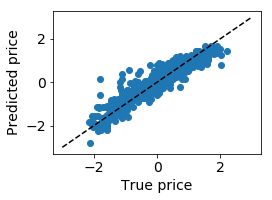

In [137]:
plt.figure(figsize=(4, 3))
plt.scatter(y_train, lr_y_predict_train)
plt.plot([-3, 3], [-3, 3], '--k')   #数据已经标准化，3倍标准差即可
plt.axis('tight')
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.tight_layout()

In [155]:
print("The lr on train is %f" % lr.score(X_train, y_train))
print("The lr on test is %f" % lr.score(X_test, y_test))
# (y_true - y_true.mean()) ** 2).sum()
# (y_true - y_pred) ** 2).sum() 
print(((y_test - lr_y_predict) **2 ).sum())
print(((y_test - y_test.mean()) **2).sum())

The lr on train is 0.882497
The lr on test is -449784161821328446324736.000000
6.56684876259e+25
146.0


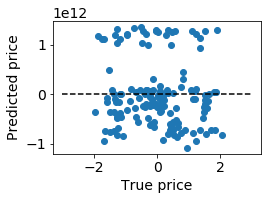

In [154]:
plt.figure(figsize=(4, 3))
plt.scatter(y_test, lr_y_predict)
plt.plot([-3, 3], [-3, 3], '--k')   #数据已经标准化，3倍标准差即可
plt.axis('tight')
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.tight_layout()

默认的线性回归特别差,尝试其它线性回归模型 

## SGDRegressor

In [139]:
# 线性模型，随机梯度下降优化模型参数
# 随机梯度下降一般在大数据集上应用，其实本项目不适合用
from sklearn.linear_model import SGDRegressor

# 使用默认配置初始化线
sgdr = SGDRegressor(max_iter=1000)

# 训练：参数估计
sgdr.fit(X_train, y_train)

# 预测
#sgdr_y_predict = sgdr.predict(X_test)

sgdr.coef_

I:\Anaconda2\envs\python3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([-0.04062609,  0.9121332 ,  1.0192705 , -0.17275434, -0.17960829,
       -0.63920003,  0.08066705,  0.03879924, -0.84081151,  0.2068356 ,
       -0.19418511,  0.01317443,  0.03360124,  0.150725  , -0.2713204 ,
        0.2713204 , -0.02701841, -0.02749731, -0.00808194, -0.03222901,
        0.02497788,  0.04396693,  0.01893957,  0.04061853,  0.07876682,
        0.00683409, -0.06792411, -0.05045953,  0.01925582, -0.01925582,
       -0.04441079, -0.02065913, -0.00473173,  0.00679796,  0.0246073 ,
        0.00914199,  0.02692381, -0.01870347,  0.01870347,  0.14833613,
       -0.08985701, -0.18816093])

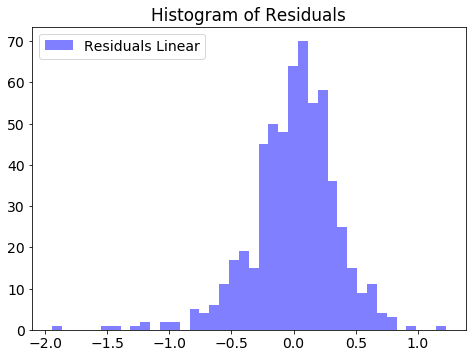

In [140]:
f, ax = plt.subplots(figsize=(7, 5)) 
f.tight_layout() 
ax.hist(y_train - lr_y_predict_train,bins=40, label='Residuals Linear', color='b', alpha=.5); 
ax.set_title("Histogram of Residuals") 
ax.legend(loc='best');

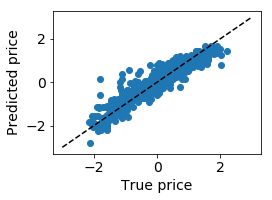

In [141]:
plt.figure(figsize=(4, 3))
plt.scatter(y_train, lr_y_predict_train)
plt.plot([-3, 3], [-3, 3], '--k')   #数据已经标准化，3倍标准差即可
plt.axis('tight')
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.tight_layout()

In [142]:
print("The lr on train is %f" % sgdr.score(X_train, y_train))
print("The lr on test is %f" % sgdr.score(X_test, y_test))

The lr on train is 0.878836
The lr on test is 0.876491


## RidgeCV

In [143]:
#岭回归／L2正则
#class sklearn.linear_model.RidgeCV(alphas=(0.1, 1.0, 10.0), fit_intercept=True, 
#                                  normalize=False, scoring=None, cv=None, gcv_mode=None, 
#                                  store_cv_values=False)
from sklearn.linear_model import  RidgeCV

alphas = [0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.05, 0.1]
reg = RidgeCV(alphas=alphas, store_cv_values=True)   
reg.fit(X_train, y_train)    

RidgeCV(alphas=[0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.05, 0.1], cv=None,
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=True)

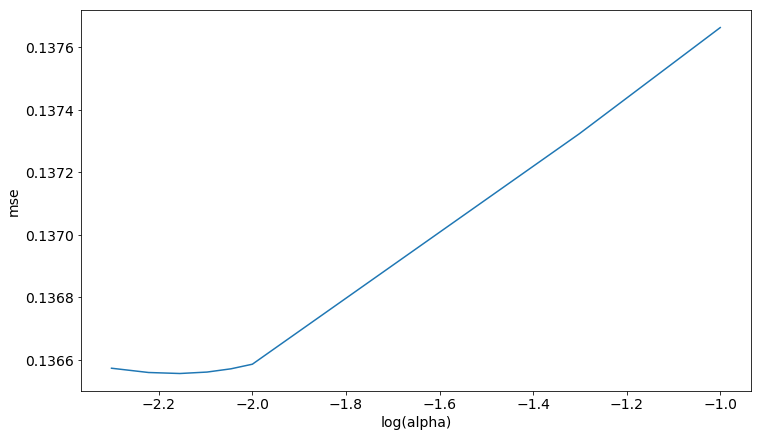

alpha is: 0.007


array([[ -6.90475168e-01,   5.21399390e+00,  -2.70632667e+00,
         -1.84017842e-01,  -2.10090219e-01,   1.47843853e+00,
          1.00175817e-01,  -1.14638332e-01,  -3.42648524e+00,
          2.53923954e-01,  -1.99800461e-01,   3.97818135e-03,
          4.85549425e-02,   1.50466108e-01,  -5.54720461e-01,
          5.54720461e-01,  -1.55797835e-01,  -1.28200659e-01,
         -9.57425964e-02,  -9.95636825e-02,  -1.95609794e-02,
          3.10449969e-02,   3.58455286e-02,   7.34742311e-02,
          1.25751786e-01,   8.89916478e-02,   5.29575957e-02,
          1.05247368e-01,   1.94806449e-02,  -1.94806449e-02,
         -4.27933120e-02,  -2.15866875e-02,  -2.71564655e-03,
          4.44836194e-03,   2.35201444e-02,   1.01372427e-02,
          2.67783109e-02,  -1.77103838e-02,   1.77103838e-02,
          1.66536974e-01,  -1.03213717e-01,  -2.04030916e-01]])

In [144]:
mse_mean = np.mean(reg.cv_values_, axis = 0)
plt.plot(np.log10(alphas), mse_mean.reshape(len(alphas),1)) 
plt.xlabel('log(alpha)')
plt.ylabel('mse')
plt.show()

print ('alpha is:', reg.alpha_)
reg.coef_

In [145]:
print("The reg on train is %f" % reg.score(X_train, y_train))
print ("The reg on test is %f" % reg.score(X_test, y_test))

The reg on train is 0.882261
The reg on test is 0.878660


## Lasso

In [158]:
#### Lasso／L1正则
# class sklearn.linear_model.LassoCV(eps=0.001, n_alphas=100, alphas=None, fit_intercept=True, 
#                                    normalize=False, precompute=’auto’, max_iter=1000, 
#                                    tol=0.0001, copy_X=True, cv=None, verbose=False, n_jobs=1,
#                                    positive=False, random_state=None, selection=’cyclic’)
from sklearn.linear_model import LassoCV

alphas = [1.0e-10, 0.0000001, 0.0001, 0.01, 0.1, 1, 10,100]

lasso = LassoCV(alphas=alphas)   
lasso.fit(X_train, y_train)       

I:\Anaconda2\envs\python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
I:\Anaconda2\envs\python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
I:\Anaconda2\envs\python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


LassoCV(alphas=[1e-10, 1e-07, 0.0001, 0.01, 0.1, 1, 10, 100], copy_X=True,
    cv=None, eps=0.001, fit_intercept=True, max_iter=1000, n_alphas=100,
    n_jobs=1, normalize=False, positive=False, precompute='auto',
    random_state=None, selection='cyclic', tol=0.0001, verbose=False)

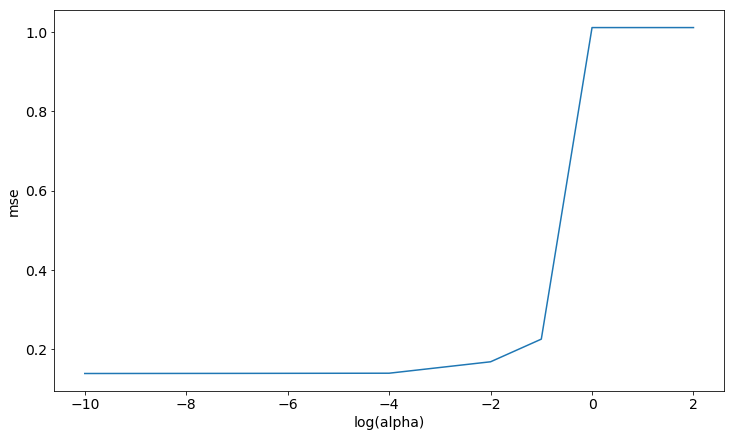

alpha is: 1e-10


array([ -3.97238884e-01,   1.75646277e+00,   5.07825094e-01,
        -1.82033105e-01,  -1.98517519e-01,  -3.08664229e-01,
         9.44004502e-02,   2.71465166e-02,  -1.46811071e+00,
         2.66395490e-01,  -2.86389960e-01,  -8.28989432e-02,
        -4.78606347e-02,   6.34156622e-02,  -8.53022303e-01,
         5.00053239e-16,  -1.27048376e-01,  -1.13727500e-01,
        -8.80416473e-02,  -1.03696865e-01,  -3.08470190e-02,
         7.50495799e-03,   1.35529200e-03,   2.90482818e-02,
         7.59058784e-02,   2.06988732e-02,  -3.33739655e-02,
         3.92252718e-03,   4.94631598e-02,  -4.60244177e-15,
        -7.56410067e-02,  -2.73426278e-02,  -1.00117041e-02,
        -1.87803464e-03,   1.82320754e-02,   3.65918876e-03,
        -6.90908244e-03,  -2.04032363e-03,   7.79713717e-18,
         3.25639742e-01,   5.18351950e-02,  -1.54611410e-01])

In [159]:
mses = np.mean(lasso.mse_path_, axis = 1)
plt.plot(np.log10(lasso.alphas_), mses) 
#plt.plot(np.log10(lasso.alphas_)*np.ones(3), [0.3, 0.4, 1.0])
plt.xlabel('log(alpha)')
plt.ylabel('mse')
plt.show()    
            
print ('alpha is:', lasso.alpha_)
lasso.coef_  

In [160]:
print("The reg on train is %f" % lasso.score(X_train, y_train))
print ('The reg on test is %f'% lasso.score(X_test, y_test))

The reg on train is 0.880519
The reg on test is 0.877466


# 结论

In [ ]:
RidgeCV在test上的R^2=0.878660
比其它模型更好
应当选择RidgeCV